<h1><center>  Project 3 </center> </h1> 

<center> Bruno Gomes Coelho - 9791160 </center>
<center> Gabriel de Melo Cruz - 9763043 </center>


### Imports

In [209]:
import collections

from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [210]:
TESTING = True

In [211]:
def degree_distribution(G, hist=False, title="Degree distribution"):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    
    if hist:
        plt.hist(vk, bins=range(0, maxk+1), density=True)
        plt.ylabel("Pk", fontsize=15)
        plt.xlabel("Degree", fontsize=15)
        plt.title(title, fontsize=20)
        plt.grid(True)
        plt.show(True)
    
    return kvalues, Pk

def average_degree(graph):
    degrees = graph.degree()
    return np.mean([*dict(degrees).values()])

def second_moment(graph):
    M = 0
    N = len(graph)
    for i in graph.nodes:
        M = M + graph.degree(i)**2
    M = M/N
    return M


def avg_shortest_path(graph):
    if nx.is_connected(graph) == True:
        return nx.average_shortest_path_length(graph)
    else:
        print('We will use only the largest component')
        connected =sorted(nx.connected_component_subgraphs(graph), 
                          key=len, reverse=True)
        return nx.average_shortest_path_length(connected[0])

    
def diameter(graph):
    if nx.is_connected(graph) == True:
        return nx.diameter(graph)
    else:
        print('We will use only the largest component')
        connected =sorted(nx.connected_component_subgraphs(graph), 
                          key=len, reverse=True)
        return nx.diameter(connected[0])

    
all_funcs = {
    "Num nodes": lambda x: len(x.nodes),
    "Avg degree": average_degree,
    "2nd Momentum": second_moment,
    "Avg shortest path": avg_shortest_path,
    "Avg clust coef": nx.average_clustering,
    "Transivity": nx.transitivity,
    "Assortativity coef": nx.degree_assortativity_coefficient,
}

   

# Q1

In [212]:
def erdos_renyi(N=100, avg_degree=20, p=None):
    if p is None:
        p = avg_degree/(N-1)
    return nx.gnp_random_graph(N, p, seed=None, directed=False)

def barabasi_albert(N=100, avg_degree=20):
    m = int(avg_degree/2)
    return nx.barabasi_albert_graph(N, m)

def watts_strogatz(N=100, avg_degree = 20, p=1):
    k = int(avg_degree/2)
    return nx.watts_strogatz_graph(N, k, p, seed=None)

graphs = {
    "Erdos Renyi": erdos_renyi,
    "Barabasi Albert": barabasi_albert,
    "Watts Strogatz (p=0.1)": lambda x: watts_strogatz(x, p=0.1),
    "Watts Strogatz (p=0.01)": lambda x: watts_strogatz(x, p=0.01),
}

,Num nodes,Avg degree,2nd Momentum,Avg shortest path,Avg clust coef,Transivity,Assortativity coef,type


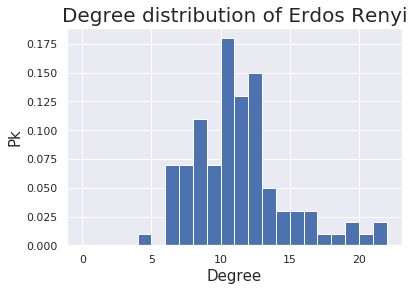

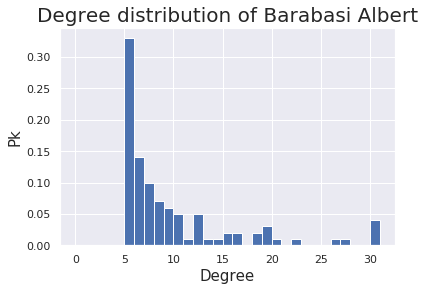

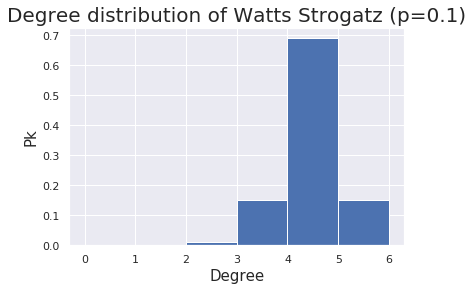

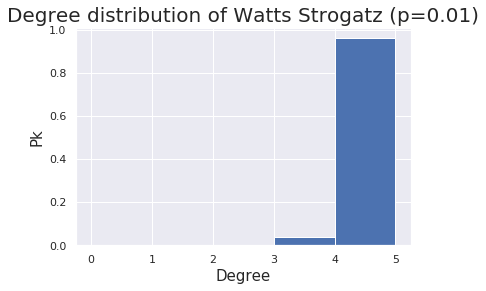

In [238]:
# Create a DF for storing all the data points for exercise 5
cols = list(all_funcs.keys())
cols.append("type")
all_data_points = pd.DataFrame(columns=cols)

# Create another DF just for mean/STD
results = pd.DataFrame(index=graphs.keys())

N = 100 if TESTING else 1000
REPS = 3 if TESTING else 10

for graph_name, graph_func in graphs.items():
    all_results = collections.defaultdict(list)
    # Calculate various time the different measures
    for idx in range(REPS):
        graph = graph_func(N)
        # Show the degree dist of a random member
        if idx == 0:
            degree_distribution(graph, hist=True, 
                                title=f"Degree distribution of {graph_name}")

        new_row = pd.Series(index=cols)
        for name, func in all_funcs.items():
            value = func(graph)
            all_results[name].append(value)
            new_row[name] = value
        new_row["type"] = graph_name
        all_data_points = all_data_points.append(new_row, ignore_index=True)
    
    # Calculate mean and std of measures
    for name in all_funcs.keys():
        all_results[name] = np.array(all_results[name])
        mean = all_results[name].mean()
        std = all_results[name].std()
        results.loc[graph_name, name + " mean"] = mean
        results.loc[graph_name, name + " std"] = std

In [240]:
results.T

,Erdos Renyi,Barabasi Albert,Watts Strogatz (p=0.1),Watts Strogatz (p=0.01)
Num nodes mean,100.000000,100.000000,100.000000,100.000000
Num nodes std,0.000000,0.000000,0.000000,0.000000
Avg degree mean,9.886667,9.500000,4.000000,4.000000
Avg degree std,0.688251,0.000000,0.000000,0.000000
2nd Momentum mean,107.600000,130.020000,16.393333,16.086667
2nd Momentum std,15.799975,2.985342,0.024944,0.009428
Avg shortest path mean,2.243906,2.220404,5.002761,7.909764
Avg shortest path std,0.053673,0.012316,0.095279,0.602447
Avg clust coef mean,0.096382,0.182940,0.361778,0.467556
Avg clust coef std,0.013062,0.005919,0.010457,0.003247


# TODO: DISCUSS


---

<br>
<br>
<br>
<br>
<br>
<br>



# Q2

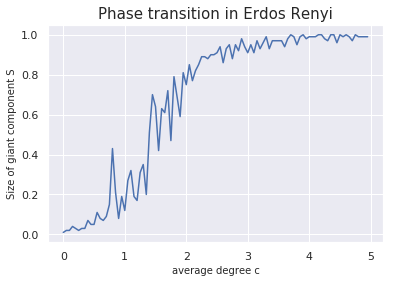

In [187]:
S = []
vk = []
for c in np.arange(0, 5, 0.05):
    p = c/(N-1)
    graph = erdos_renyi(N=N, p=p)
    connected_graph = sorted(nx.connected_component_subgraphs(graph), 
                             key=len, reverse=True)
    S.append(len(connected_graph[0])/N)
    vk.append(c)

plt.figure()
plt.plot(vk, S, 'b', label='Largest component size')
plt.xlabel("average degree c", fontsize=10)
plt.ylabel("Size of giant component S", fontsize=10)
plt.title("Phase transition in Erdos Renyi", fontsize=15)
plt.grid(True)
plt.show();

In [ ]:
#Verify the small-world property by plotting the average shortest path length 
#and diameter in terms of the number of nodes:

In [206]:
%%time
all_ns = [x for x in range(100, 1001, 100)]
all_ks = [4, 10, 20, 30]
path_lengths = collections.defaultdict(list)
diameters = collections.defaultdict(list)
temp = collections.defaultdict(list)

for k in all_ks:
    for n in all_ns:
        graph = erdos_renyi(N=n, avg_degree=k)
        path_lengths[k].append(all_funcs["Avg shortest path"](graph))
        temp[k].append(diameter(graph))
        value = np.array(list(dict(graph.degree).values())).mean()
        diameters[k].append(np.log10(n) / np.log10(value))
    if TESTING:
        break

We will use only the largest component
We will use only the largest component
We will use only the largest component
We will use only the largest component
We will use only the largest component
We will use only the largest component
We will use only the largest component
We will use only the largest component
We will use only the largest component
We will use only the largest component
We will use only the largest component
We will use only the largest component
We will use only the largest component
We will use only the largest component
We will use only the largest component
We will use only the largest component
We will use only the largest component
We will use only the largest component
We will use only the largest component
We will use only the largest component
CPU times: user 34.5 s, sys: 0 ns, total: 34.5 s
Wall time: 34.5 s


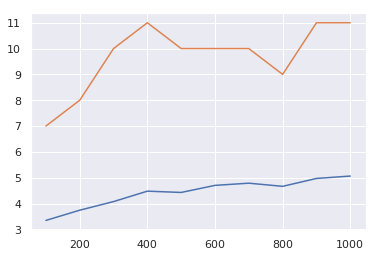

In [207]:
for k in all_ks:
    plt.plot(all_ns, diameters[k], label="small")
    plt.plot(all_ns, temp[k], label="diameter")
    break

### Verify the variance of the degree distribution in terms of the parameter p, i.e., construct a plot of the second moment of degree distribution in terms of p


In [ ]:
%%time
all_ps = np.arange(0, 1, 0.01)

for p in all_ps:
    graph = erdos_renyi(N=n, avg_degree=k)
    path_lengths[k].append(all_funcs["Avg shortest path"](graph))
    temp[k].append(diameter(graph))
    value = np.array(list(dict(graph.degree).values())).mean()
    diameters[k].append(np.log10(n) / np.log10(value))
    if TESTING:

Plot the degree distribution of the small-world modelfor p=0.001, 0.01 and 0.1

# TODO: DISCUSS


---

<br>
<br>
<br>
<br>
<br>
<br>



# Q3

In [159]:
%%time
vcc = []
vl = []
vq = []
start = 0
for stop in [0.001, 0.01, 0.1, 1]:
    if stop == 0.001:
        continue
    for p in np.linspace(start, stop, num=10):
        graph = watts_strogatz(p=p)
        cc = nx.average_clustering(graph)
        vcc.append(cc)
        l = nx.average_shortest_path_length(graph)
        vl.append(l)
        vq.append(p)
    start = stop

CPU times: user 1.54 s, sys: 16 µs, total: 1.54 s
Wall time: 1.54 s


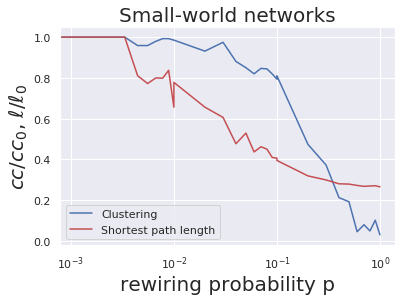

In [167]:
plt.figure()
plt.semilogx(vq, np.array(vcc)/vcc[0], 'b', label='Clustering')
plt.semilogx(vq, np.array(vl)/vl[0], 'r', label='Shortest path length')
plt.xlabel("rewiring probability p", fontsize=20)
plt.ylabel("$cc/cc_0$, $\ell/\ell_0$", fontsize=20)
plt.title("Small-world networks", fontsize=20)
plt.legend()
plt.grid(True)
plt.show();

### Verify the variance of the degree distribution in terms of the parameter p, i.e., construct a plot of the second moment of degree distribution in terms of p.

In [178]:
%%time
lst = []
all_ps = np.linspace(0, 1, num=200)
for p in all_ps:
    graph = watts_strogatz(p=p)
    lst.append(second_moment(graph))

CPU times: user 242 ms, sys: 9 µs, total: 242 ms
Wall time: 240 ms


No handles with labels found to put in legend.


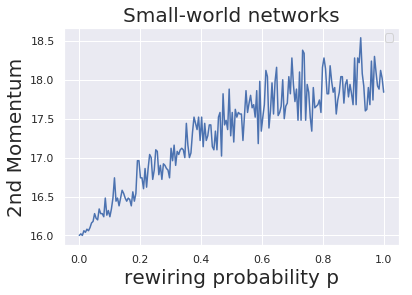

In [179]:
plt.figure()
plt.plot(all_ps, lst)
plt.xlabel("rewiring probability p", fontsize=20)
plt.ylabel("2nd Momentum", fontsize=20)
plt.title("Small-world networks", fontsize=20)
plt.legend()
plt.grid(True)
plt.show();

### Plot the degree distribution of the small-world model for p=0.001, 0.01 and 0.1.


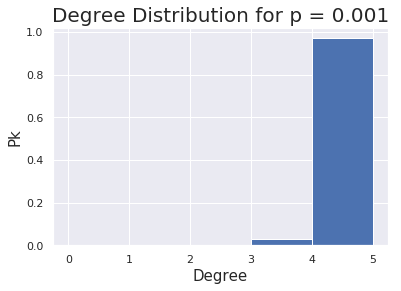

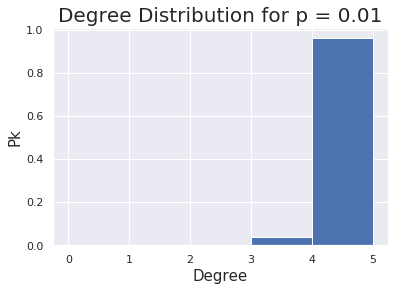

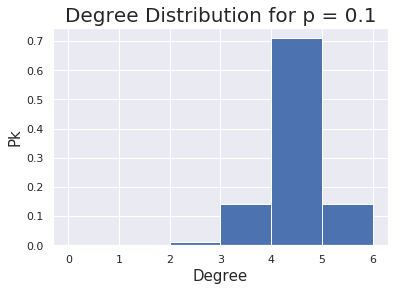

In [213]:
for p in [0.001, 0.01, 0.1]:
    graph = watts_strogatz(p=p)
    degree_distribution(graph, hist=True, 
                        title=f"Degree Distribution for p = {p}")

### Obtain the following plot in terms of p (consider curves for p=0, 0.001, 0.01, 0.1 and 1):

TODO

# TODO: DISCUSS


---

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>



# Q4

# TODO: DISCUSS


---

<br>
<br>
<br>
<br>
<br>
<br>



# Q5 - Classification of networks

Choose three networks and perform the classification. Show the results by using the PCA.

Escolhemos o network hamster, human protein e US Airports:

In [251]:
all_graphs = {}
all_graphs["Hamster"] = nx.read_edgelist("data/out.petster-friendships-hamster-uniq", 
                                         comments="%")

all_graphs["Human Protain"] = nx.read_edgelist("data/out.proteins", comments="%")

all_graphs["US Airports"] = nx.Graph()
all_graphs["US Airports"] = nx.read_edgelist("data/USairport500.txt", nodetype=int, data=(('weight',float),))

# Convert data to undirected and remove loops
for graph in all_graphs.keys():
    all_graphs[graph] = all_graphs[graph].to_undirected()
    all_graphs[graph].remove_edges_from(nx.selfloop_edges(all_graphs[graph]))

In [253]:
x_test = pd.DataFrame(index=all_graphs.keys(), columns=all_funcs.keys())
for graph_name, graph in all_graphs.items():
    for name, func in all_funcs.items():
        x_test.loc[graph_name, name] = func(graph)

We will use only the largest component
We will use only the largest component


In [256]:
x = all_data_points.drop(columns="type")
y = all_data_points["type"]
pca = PCA(n_components=2)
if not TESTING:
    assert results.isna().sum().sum() == 0
x_pca = pca.fit_transform(x)
x_test_pca = pca.transform(x_test)

Text(0.5, 0, '2nd principal component')

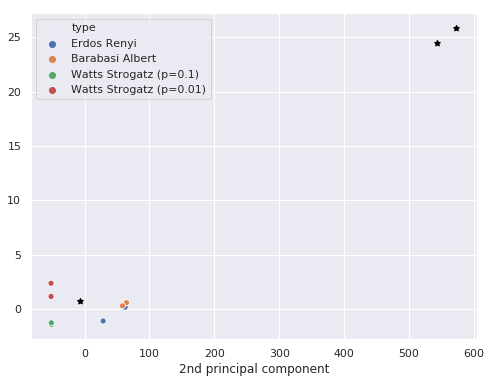

In [281]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=y)
plt.scatter(x_test_pca[:,0], x_test_pca[:,1], marker=(5, 1), c="black")
plt.xlabel("1st principal component")
plt.xlabel("2nd principal component")